In [13]:
import numpy as np
import pandas as pd

# Learning outcomes

Throughout this course we will cover:
- Quick introduction on the different types of Machine Learning/AI use cases
- What is regression and where can it be applied ?
- Various techniques to perform regression modeling including linear and non-linear and why it matters for modeling
- Python libraries in our toolbox
- Object orientation for the simple case of our project
- Facts about the dataset we will be working with some exploratory data analysis to help us understand it
- Visualization of relationships between variables
- Evaluation and model diagnostics

# Introduction

Machine Learning and AI has picked up in the last decade as we have generated exponentially more data leading to the surge in demand to make sense of complex relationships found within. 

![alt text](./imgs/global-data-generated-annually.png "Title")

<center>Global data generated in recent and coming years<a href="https://explodingtopics.com/blog/data-generated-per-day"><sup>[1]</sup></a> </center>

With an ever increasing amount of data, we require more automation of processes to handle information and in the process it has enabled us the following:
1. Automated labeling of incoming new data (Classification)
2. Content generation (Generative Models)
3. Value estimation (Regression Models)

## Automated labeling of incoming new data (Classification)

The first one is referred to as "classification" in the Machine Learning literature. Given a new data point we want our algorithm to describe to us in an instant which of the pre-defined classes it belongs to. Picture a scenario of you wanting to be able to automatically label gooseberries and watermellons. You would gather data on your fruits such as width and heigth together with your knowledge of what fruit each pair of width and height is. You would then present this data to the algorithm and train it so it can learn these relationships.

This technique belongs to the 'supervised learning' category, where models are simultaniously shown data with the attached label (category) they belong to in order to learn what are the distinct features of the classes.
![alt text](./imgs/classification.png "Gooseberry vs watermellons")

Our simplistic model assumes the entire universe only consists of watermellons which are big and gooseberries which are small. The variables sufficient for this type of model would be the height and width of the fruits. With only two variables, we wouldn't need too many examples of them to train a model to learn the difference between "small" and "big". 

Classification techniques assigning a label to a data point from a fixed-set, for example {0,1) where 0 is our "gooseberry" and 1 is our "watermellon".

Example real world use-cases:
- Credit scoring models - will this customer pay us back in the future ? (binary classification)
- Is this device operating correctly ? (binary classification)
- Image based automated produce classification on check-outs in supermarkets (multiclass)
- Image based plant/mushroom identification (multiclass)

and many more...

## Content generation (Generative Models)

Models trained on huge text sets are capable of doing amazing things. You have most likely by now heard about Chat GPT and its amazing features to generate text, provide advice, help out with technical tasks among others. The same goes for images - <a href="https://thispersondoesnotexist.com/">This person does not exist</a> which allows you to generate images of faces of people who as the title suggest - are not real. To capture the facial features and be able to generate new ones requires working on large matrixes, large datasets and sufficient computational power. 

Below, a sample output from the website:

<img src="./imgs/thispersondoesnotexist.jpg" alt="Drawing" style="width: 400px;"/>


Example use-cases around generative AI involves:
- Content creation for marketing campaigns
- In-game content (models, textures...)
- Writing emails
- Improving existing code
- Transfering styles between art and images


and many more ...

## Value estimation (Regression Models)

Imagine yourself in need of telling aproximately how many kg each one of your watermellons have. Your friend only allows you to borrow his/her scale for a limited amount of time. What do you do? You take notes on width and height(data) of each watermellon and weigh it on the scale (true values). Once your time is out and your friend needs the scale back, you are left with a table of width, height and the corresponding weight of each of your watermellons.  Hopefully you can see that the building blocks for this are not that dissimiliar from classification problems and regression modelling is another example of 'supervised learning' .

Instead of assigning a datapoint (width,height) to a class (discrete number) (0 for "gooseberry" and 1 for "watermellon") we want to get a continuous value of its weight in kg, thus replacing the scale we no longer have access too and which can be assumed to be a equivalent of "manual labour".

<img src="./imgs/regression_1.png" alt="Drawing" style="width: 400px;"/>

This class will focus on how to build such models, but instead of fruits we will be dealing with something more complex and therefore also more exciting - apartment prices. However to inspire you here are as usually some more use-cases:
- Estimating remaining useful lifetime on machine components
- Price elasticity modeling
- Stock price predictions
- Sales forecasting

and as always - many more ...

# Formalizing Regression

## Terms and nomenclature

$X$ - are our so called "independent variables" which are values we collect throughout our studies (width/height) in the watermellon examples above. Often referred to as "variables" (of a model). 

$y$ - is the "dependent variable" which is the one we want our model to predict. It "depends" on what the inputs to the model are - our $X$'s. In the example of the watermellon case it would be the true watermellon weight that we measured using the scale when collecting our data. Commonly referred to as the "target variable".

$\hat{y}$ - is the value estimated(predicted) by our model(s). It is pronounced as "y-hat". In our watermellon-case this would be the values we predicted using our model once we had to hand back the scale to our friend. These are commonly (and for avery good reason) referred to as "predicted values".

$\beta_0$ ... $\beta_n$ - regression coefficients. Those are values estimated by model(s) that indicate how to transform the input variables ($X$) to make correct predictions. We will return to this after we introduce Linear Regression below.

Picture this example again:

<img src="./imgs/regression_1.png" alt="Drawing" style="width: 400px;"/>

Somehow the model had to arrive at 10.65 kg. This was done by having a constant value $\beta_0$ + $\beta_1$ * $width$ + $\beta_2$ * $height$ = $\hat{y}$

## Linear regression and Least Square Method

For simplicity and easy of visualizing, let's assume that instead of width and height, we only collect one of the two - the width. By doing this we make a (reasonable) assumption that the two variables are positively correlated meaning that "larger width follows larger height" - the rounder our watermellons the less wrong we are.

We are looking to find the equation for our model such that:

$\hat{y}$ = $\beta_0$ + $\beta_1$ * $width$

To do this we will create a dataset of watermellon widths and weights and plot it.

   width  weight
0   57.0    9.70
1   55.3    9.50
2   54.2    9.50
3   56.1    9.54
4   61.0   10.65
5   60.0    9.65
6   56.5    9.90


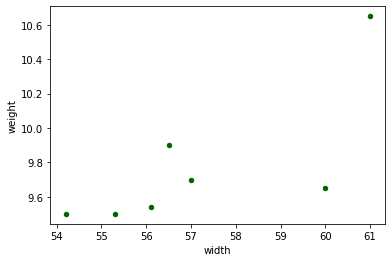

In [44]:
watermellons = pd.DataFrame({"width":[57,55.3,54.2,56.1,61,60,56.5],
                            "weight": [9.7,9.5,9.5,9.54,10.65,9.65,9.9]
                            })
print(watermellons)
plt = watermellons.plot.scatter(x='width',y='weight',c='darkgreen')

<AxesSubplot:xlabel='width', ylabel='weight'>

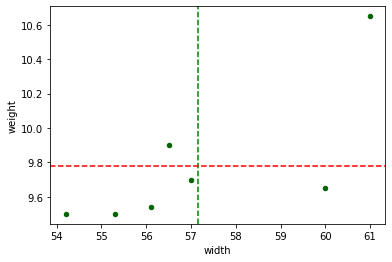

In [60]:
plt = watermellons.plot.scatter(x='width',y='weight',c='darkgreen')
plt.axvline(watermellons.width.mean(), color='g', linestyle='--')
plt.axhline(watermellons.weight.mean(), color='r', linestyle='--')
plt

Drawing the lines of the average width and height gives us a point through which all the regression line will have to go through. In the next step, let's compute the differences between our observations and these lines for each respective dimension.

We also add two more columns: 
1. $(width - meanwidth)^2$ 
2. $(width - meanwidth) * (weight - meanweight)$

In [62]:
watermellons['width_minus_width_mean'] = watermellons['width'] - watermellons.width.mean()
watermellons['weight_minus_weight_mean'] = watermellons['weight'] - watermellons.weight.mean()
watermellons['width_minus_width_mean_squared'] = watermellons['width_minus_width_mean'] * watermellons['width_minus_width_mean']
watermellons['width_meanwidth_times_weight_meanweight'] = watermellons['width_minus_width_mean'] * watermellons['weight_minus_weight_mean']

watermellons

,width,weight,width_minus_width_mean,weight_minus_weight_mean,width_minus_width_mean_squared,width_meanwidth_times_weight_meanweight
0,57.0,9.70,-0.157143,-0.077143,0.024694,0.012122
1,55.3,9.50,-1.857143,-0.277143,3.448980,0.514694
2,54.2,9.50,-2.957143,-0.277143,8.744694,0.819551
3,56.1,9.54,-1.057143,-0.237143,1.117551,0.250694
4,61.0,10.65,3.842857,0.872857,14.767551,3.354265
5,60.0,9.65,2.842857,-0.127143,8.081837,-0.361449
6,56.5,9.90,-0.657143,0.122857,0.431837,-0.080735


What is $\beta_1$ ?

$\beta_1$ is the slope of our line, and $\beta_0$ is where the line intersects the y-axis. To find it we will need to divide the sum of the last two columns by each other. Where "width_minus_width_mean_squared" is the denominator and "width_meanwidth_times_weight_meanweight" the numerator

In [64]:
watermellons['width_meanwidth_times_weight_meanweight'].sum() / watermellons['width_minus_width_mean_squared'].sum()

0.12314294631710368

0.12314294631710368 is therefore the slope of our line, $\beta_1$.

How to get $\beta_0$ ?

watermellons.weight.mean() = $\beta_0$ + $\beta_1$ * watermellons.width.mean()

Re-arranging the terms and we know that $\beta_1$ is 0.12314.... :

$\beta_0$  = watermellons.weight.mean() -  0.12314294631710368 * watermellons.width.mean()


In [65]:
watermellons.weight.mean() - 0.12314294631710368 * watermellons.width.mean()

2.738643882646689

In [68]:
b0 = 2.738643882646689
b1 =0.12314294631710368

Our final equation for our watermellon model is therefore:
    
$\hat{y}$ = 2.738643882646689 + 0.12314294631710368 * $watermellonwidth$

Let's try it on a watermellon whichs width is 58.5 cm
    

In [67]:
2.738643882646689 + 0.12314294631710368 * 58.5

9.942506242197254

<AxesSubplot:xlabel='width', ylabel='weight'>

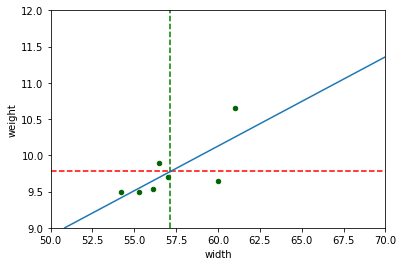

In [74]:
plt = watermellons.plot.scatter(x='width',y='weight',c='darkgreen')
plt.axvline(watermellons.width.mean(), color='g', linestyle='--')
plt.axhline(watermellons.weight.mean(), color='r', linestyle='--')
plt.axline((0, b0), slope=b1, color='C0')
plt.set_xlim([50,70])
plt.set_ylim([9,12])
plt

Example of footnote.<br>
Example of footnote.<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2)


<a name="https://explodingtopics.com/blog/data-generated-per-day">https://explodingtopics.com/blog/data-generated-per-day</a>1. [^](#https://explodingtopics.com/blog/data-generated-per-day) footnote 1<br>
<a name="cite_note-2"></a>2. [^](#cite_ref-2) footnote 2


# History

The earliest mention of the term "regression" comes from the 19th century where the polymath Sir Francis Galton created a model to describe the relationship between parents height and their children. 

For the curious reader: <a href="https://select-statistics.co.uk/blog/regression-to-the-mean-as-relevant-today-as-it-was-in-the-1900s/">Galtons study</a>